<a href="https://colab.research.google.com/github/YASsMeN1997/Decision-Tree-Algorithm/blob/main/Car_Price_Prediction_with_linear_regression_(implementing_from_scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading the data

In [3]:
!git clone https://github.com/alexeygrigorev/mlbookcamp-code


fatal: destination path 'mlbookcamp-code' already exists and is not an empty directory.


importing the independencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
# reading the data from csv file as pandas data-frame
car_data=pd.read_csv('/content/mlbookcamp-code/chapter-02-car-price/data.csv')

In [5]:
# read frist 5 rows of our data
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
car_data.shape

(11914, 16)

In [9]:
car_data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [10]:
len(car_data.columns)

16

In [11]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [45]:
car_data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
log_price               0
dtype: int64

we notices that we have missing values which will deals with them later

In [121]:
# print the first 5 largest unique values of the columns
for col in car_data.columns:
  print(col,':',car_data[col].unique())
  print(car_data[col].value_counts().nlargest(5))
  print('\n',20*'*','\n')

make : ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

 ******************** 

model : ['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class'

In [122]:
# we will make some cleaing to our data
car_data.columns = car_data.columns.str.lower().str.replace(' ', '_')
string_columns = list(car_data.dtypes[car_data.dtypes == 'object'].index)
for col in string_columns:
  car_data[col]=car_data[col].str.lower().str.replace(' ','_')

In [123]:
car_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.00,6.00,manual,rear_wheel_drive,2.00,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.74
1,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,28,19,3916,40650,10.61
2,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.50
3,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,28,18,3916,29450,10.29
4,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,28,18,3916,34500,10.45


In [124]:
car_data.rename(columns={'msrp':'price'},inplace=True)

Exploratory Data Analysis


In [125]:
pd.options.display.float_format = '{:,.2f}'.format
car_data.describe()


,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,log_price
count,"11,914.00","11,845.00","11,884.00","11,908.00","11,914.00","11,914.00","11,914.00","11,914.00","11,914.00"
mean,"2,010.38",249.39,5.63,3.44,26.64,19.73,"1,554.91","40,594.74",10.11
std,7.58,109.19,1.78,0.88,8.86,8.99,"1,441.86","60,109.10",1.11
min,"1,990.00",55.00,0.00,2.00,12.00,7.00,2.00,"2,000.00",7.60
25%,"2,007.00",170.00,4.00,2.00,22.00,16.00,549.00,"21,000.00",9.95
50%,"2,015.00",227.00,6.00,4.00,26.00,18.00,"1,385.00","29,995.00",10.31
75%,"2,016.00",300.00,6.00,4.00,30.00,22.00,"2,009.00","42,231.25",10.65
max,"2,017.00","1,001.00",16.00,4.00,354.00,137.00,"5,657.00","2,065,902.00",14.54


In [126]:
car_data.describe(include=['O']) # including non numerical values (object)


,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


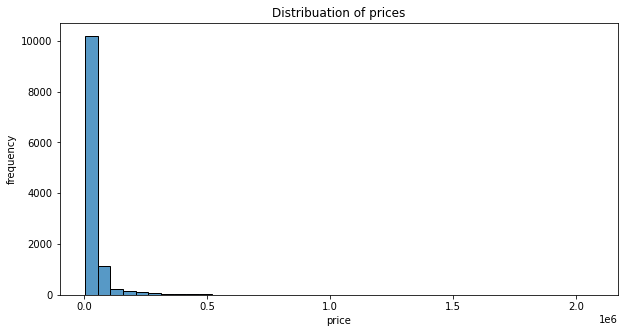

In [127]:
# Target variable analysis (price)
plt.figure(figsize=(10, 5))

sns.histplot(car_data.price,bins=40)
plt.ylabel('frequency')
plt.xlabel('price')
plt.title('Distribuation of prices')
plt.show()


This is a long tail distribution, which is a typical situation for many items with low prices and very few expensive ones.

We can have a closer look by zooming in a bit and looking at values below $100,000


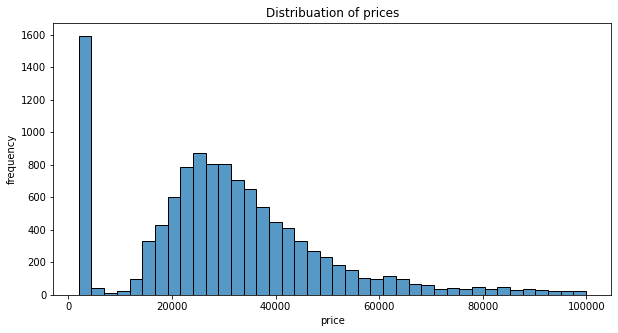

In [128]:
plt.figure(figsize=(10, 5))

sns.histplot(car_data.price[car_data.price<100000],bins=40)
plt.ylabel('frequency')
plt.xlabel('price')
plt.title('Distribuation of prices')
plt.show()

The long tail makes it quite difficult for us to see the distribution, but it has an even stronger effect on a model: such distribution can greatly confuse the model, so it won’t learn well enough.

One way to solve this problem is log transformation. 

Log Transformation


In [129]:
car_data['log_price']=np.log1p(car_data['price'])

In [130]:
car_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.00,6.00,manual,rear_wheel_drive,2.00,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.74
1,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,28,19,3916,40650,10.61
2,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.50
3,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,28,18,3916,29450,10.29
4,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,28,18,3916,34500,10.45


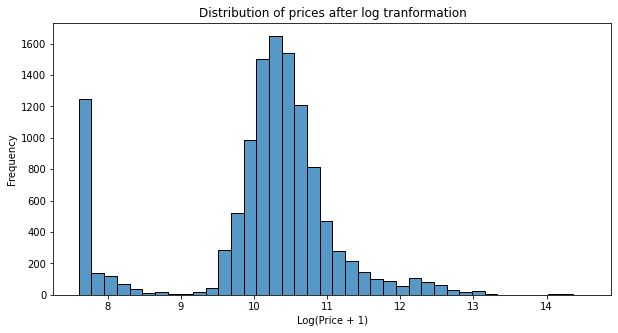

In [131]:
plt.figure(figsize=(10, 5))

sns.histplot(car_data.log_price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()


The effect of the long tail is removed, and we can see the entire distribution in one plot.

The +1 part is important in cases that have zeros. The logarithm of zero is minus infinity, but the logarithm of one is zero.

For our specific case, zero values are not an issue—all the prices we have start at $2,000—but it’s still a convention that we follow.



In [132]:
# What's the average price of BMW cars in the dataset?
car_data.groupby('make').mean()['price']['bmw']

61546.76347305389

In [133]:
# Compare the average price for cars before / after year 2015
print(car_data[car_data.year < 2015]['price'].mean())
print(car_data[car_data.year == 2015]['price'].mean())
print(car_data[car_data.year > 2015]['price'].mean())

35457.18770062511
46794.46129032258
45027.61359477124


we notice that the car prices are increased after 2015

Data Splitting(train 60% , validation 20% , test 20%)

In [134]:
np.random.seed(2)     # Fixes the random seed to make sure that the results are reproducible
n=len(car_data)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = int(0.6 *n)



In [135]:
# shuffle the data randomly
idx = np.arange(n)
np.random.shuffle(idx)
data_shuffled = car_data.iloc[idx]
print(car_data.index)
print(data_shuffled.index)


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            11904, 11905, 11906, 11907, 11908, 11909, 11910, 11911, 11912,
            11913],
           dtype='int64', length=11914)
Int64Index([ 2735,  6720,  5878, 11190,  4554,  8001,  2882,   649,   616,
             4459,
            ...
             6751,   433,  4770, 11527,  1099,  2514, 11798,  6637,  2575,
             7336],
           dtype='int64', length=11914)


In [136]:
_train = data_shuffled.iloc[:n_train].copy()
_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
_test = data_shuffled.iloc[n_train+n_val:].copy()


In [137]:
# take the target labels of train , val. and test data
y_train=_train.log_price.values
y_val=_val.log_price.values
y_test=_test.log_price.values

In [156]:
# Baseline solution
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']   # Think about Numerical only (our features)
#base = ['engine_hp', 'engine_cylinders']                                   # Think about High Correlation


In [157]:
car_data[base].isnull().sum()


engine_hp           69
engine_cylinders    30
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [158]:
# handalling the missing values with the mean value
def handle_missing_value(car_data):
  data=car_data[base]
  data=data.fillna(data.mean())
  data=data.values
  return data

In [159]:
handle_missing_value(car_data)

array([[ 335.,    6.,   26.,   19., 3916.],
       [ 300.,    6.,   28.,   19., 3916.],
       [ 300.,    6.,   28.,   20., 3916.],
       ...,
       [ 300.,    6.,   23.,   16.,  204.],
       [ 300.,    6.,   23.,   16.,  204.],
       [ 221.,    6.,   26.,   17.,   61.]])

Linear Regression


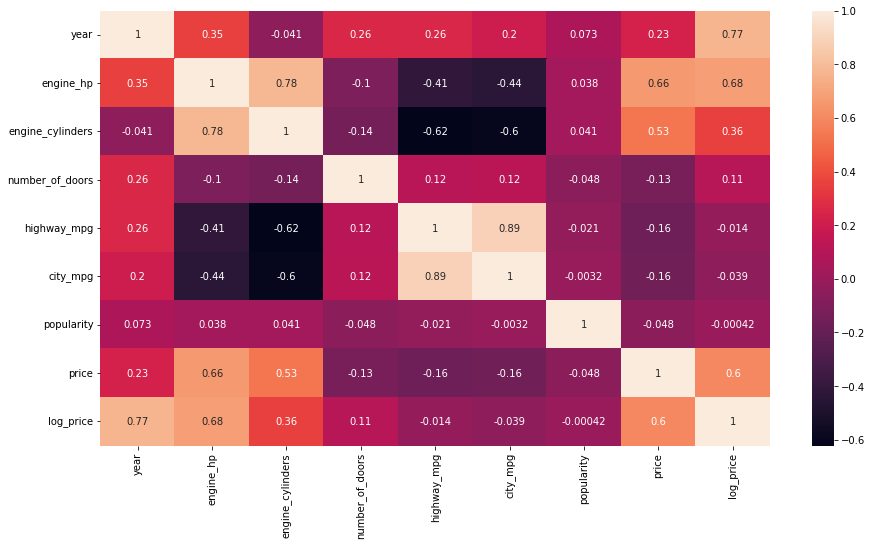

In [109]:
# we will use the equation (y=B0+B1.X) to predict the price of car
 # draw the correlation between the features each others
plt.figure(figsize=(15,8))

co=sns.heatmap(car_data.corr(),annot=True)

we will notice that the most impact features(has high correlation) are ['engine_hp', 'engine_cylinders', 'year']

 we will use the normal equation train our models (wieghts : W0 , Wi) ||




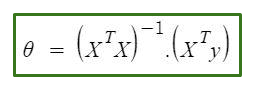

In [160]:
from numpy.lib.shape_base import column_stack
#   Formula = w0 x0 +sigma[0:n-1]{w[j]*xi[j]}  --> x0=1
    
def train_model(X,Y):
  ones=np.ones(X.shape[0])
  X=np.column_stack([ones,X])
  XTX=X.T.dot(X)
  X_INV=np.linalg.inv(XTX)
  w=X_INV.dot(X.T.dot(Y))
  w_0=w[0]
  w=w[1:]
  return w_0,w

In [111]:
x_train=handle_missing_value(_train)
w_0,w=train_model(x_train,y_train)

now we are getting our parameters

In [112]:
# we will predict our model in training data
y_pred=w_0+x_train.dot(w)

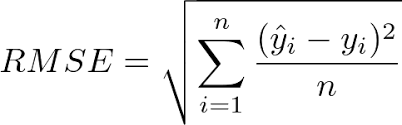

In [161]:
# to check our performance we will apply root mean squard error
def Rmse(y,y_pred):
   error=y-y_pred
   error=(error**2).mean()
   return np.sqrt(error)

In [114]:
Rmse(y_train,y_pred)

0.7422105121434195

In [115]:
# using validation set to compare rmse 
x_val=handle_missing_value(_val)
y_val_pred=w_0+x_val.dot(w)
Rmse(y_val,y_val_pred)

0.8050619382611415

To improve our model, we can create other features and add them to the existing features. This process is called feature engineering.



    Our aim is to `improve the RMSE ` calculated on the validation data.


In [162]:
# we will create feature engineering called age of cars
def handle_missing_value(car_data):
  car_data=car_data.copy()
  feature=base.copy()
  car_data['age_cars']=2017-car_data['year']
  feature.append('age_cars')
  data=car_data[feature]
  data=data.fillna(data.mean())
  data=data.values
  return data


In [163]:
x_train=handle_missing_value(_train)
w_0,w=train_model(x_train,y_train)
y_pred=w_0+x_train.dot(w)
print('rmse_train:', Rmse(y_train,y_pred))

x_val=handle_missing_value(_val)
y_val_pred=w_0+x_val.dot(w)
print('rmse_val:', Rmse(y_val,y_val_pred))


rmse_train: 0.511783357099689
rmse_val: 0.5069147355656647


adding the age feature improved the performance quiet

Handling Categorical Variables


In [167]:
# adding the numbers of doors and make to our features
def handle_missing_value(car_data):
  car_data=car_data.copy()
  feature=base.copy()
  car_data['age_cars']=2017-car_data['year']
  feature.append('age_cars')
  for v in [2, 3, 4]:
        feature1 = 'num_doors_%s' % v
        car_data[feature1] = (car_data['number_of_doors'] == v).astype(int)
        feature.append(feature1)

  for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature1 = 'is_make_%s' % v
        car_data[feature1] = (car_data['make'] == v).astype(int)
        feature.append(feature1)



  data=car_data[feature]
  data=data.fillna(data.mean())
  data=data.values
  return data

In [168]:
x_train=handle_missing_value(_train)
w_0,w=train_model(x_train,y_train)
y_pred=w_0+x_train.dot(w)
print('rmse_train:', Rmse(y_train,y_pred))

x_val=handle_missing_value(_val)
y_val_pred=w_0+x_val.dot(w)
print('rmse_val:', Rmse(y_val,y_val_pred))


rmse_train: 0.5011173271796298
rmse_val: 0.49812258600743536


performance is improved so we will add other categorical features

In [169]:
def handle_missing_value(car_data):
  car_data=car_data.copy()
  feature=base.copy()
  car_data['age_cars']=2017-car_data['year']
  feature.append('age_cars')
  for v in [2, 3, 4]:
        feature1 = 'num_doors_%s' % v
        car_data[feature1] = (car_data['number_of_doors'] == v).astype(int)
        feature.append(feature1)

  for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature1 = 'is_make_%s' % v
        car_data[feature1] = (car_data['make'] == v).astype(int)
        feature.append(feature1)
  for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature1 = 'is_make_%s' % v
        car_data[feature1] = (car_data['engine_fuel_type'] == v).astype(int)
        feature.append(feature1)
  for v in ['automatic', 'manual', 'automated_manual']:
        feature1 = 'is_make_%s' % v
        car_data[feature1] = (car_data['transmission_type'] == v).astype(int)
        feature.append(feature1)
  for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature1 = 'is_make_%s' % v
        car_data[feature1] = (car_data['driven_wheels'] == v).astype(int)
        feature.append(feature1)
  for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature1 = 'is_make_%s' % v
        car_data[feature1] = (car_data['market_category'] == v).astype(int)
        feature.append(feature1)


  data=car_data[feature]
  data=data.fillna(data.mean())
  data=data.values
  return data

In [170]:
x_train=handle_missing_value(_train)
w_0,w=train_model(x_train,y_train)
y_pred=w_0+x_train.dot(w)
print('rmse_train:', Rmse(y_train,y_pred))

x_val=handle_missing_value(_val)
y_val_pred=w_0+x_val.dot(w)
print('rmse_val:', Rmse(y_val,y_val_pred))


rmse_train: 62.89563285196422
rmse_val: 62.0427481026929


In [171]:
w.astype(int)

array([   0,  -10,   -1,   -1,    0,    0,   93,   66,   79,   15,   21,
        -61,   11,   -4, -175, -139, -140, -216,  -77, -122,   15,  686,
        621,  557,  653,    0,    0,    0,    0,    0])

the error is increased suddenly cause of overfitting so we will use regularization term in the equation of parameters


In [178]:
def train_model(X,Y,r=0.0):
  ones=np.ones(X.shape[0])
  X=np.column_stack([ones,X])
  XTX=X.T.dot(X)
  reg=r*(np.eye(XTX.shape[0]))
  XTX=XTX+reg
  X_INV=np.linalg.inv(XTX)
  w=X_INV.dot(X.T.dot(Y))
  w_0=w[0]
  w=w[1:]
  return w_0,w

In [176]:
x_train=handle_missing_value(_train)


In [182]:
# check differents values of r
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
  w_0,w=train_model(x_train,y_train,r=r)
  print('%s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))




0, -358.28, -4.07, 686.40
0.001, 8.86, -0.15, 2.24
0.01, 8.84, -0.15, 2.23
0.1, 8.67, -0.15, 2.19
1, 7.52, -0.14, 1.89
10, 5.16, -0.14, 1.27


TO make sure about the values we will check the Rmse

In [186]:
x_train=handle_missing_value(_train)
x_val=handle_missing_value(_val)

for r in [0, 0.001, 0.01, 0.1, 1, 10]:
  w_0,w=train_model(x_train,y_train,r=r)
  y_pred = w_0 + x_train.dot(w)
  y_val_pred=w_0+x_val.dot(w)
  print('r=','%6s' %r,'train:', Rmse(y_train,y_pred))
  print('r=','%6s' %r,'val:', Rmse(y_val,y_val_pred))
  print("######################")

r=      0 train: 62.89563285196422
r=      0 val: 62.0427481026929
######################
r=  0.001 train: 0.4715259408253478
r=  0.001 val: 0.46315357175917515
######################
r=   0.01 train: 0.47152636218072347
r=   0.01 val: 0.4631708785733699
######################
r=    0.1 train: 0.47156410868062015
r=    0.1 val: 0.46334596633720837
######################
r=      1 train: 0.4732380975533829
r=      1 val: 0.46516443076732666
######################
r=     10 train: 0.4887815894656292
r=     10 val: 0.48080296646417203
######################


from above values we will choose r= 0.01

In [197]:
x_train=handle_missing_value(_train)
x_val=handle_missing_value(_val)
x_test=handle_missing_value(_test)
w_0,w=train_model(x_train,y_train,r=0.01)
y_pred = w_0 + x_train.dot(w)
y_val_pred=w_0+x_val.dot(w)
test_pred=w_0+x_test.dot(w)
print('Train:', Rmse(y_train,y_pred))
print('validation:', Rmse(y_val,y_val_pred))
print('test:', Rmse(y_test,test_pred))




Train: 0.47152636218072347
validation: 0.4631708785733699
test: 0.4592790847791518


Using the model


In [198]:
i = 25
ex = df_test.iloc[i].to_dict()
ex

{'city_mpg': 20,
 'driven_wheels': 'front_wheel_drive',
 'engine_cylinders': 4.0,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 181.0,
 'highway_mpg': 26,
 'log_price': 10.367567420904209,
 'make': 'toyota',
 'market_category': 'crossover',
 'model': 'venza',
 'number_of_doors': 4.0,
 'popularity': 2031,
 'price': 31810,
 'transmission_type': 'automatic',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'year': 2014}

In [199]:
X_test = handle_missing_value(pd.DataFrame([ex]))
y_pred = w_0 + X_test.dot(w)
suggestion_price = np.expm1(y_pred) # convert the log value of price into orignal value
suggestion_price

array([21199.19744732])